# Tests notebook

In [3]:
# How many times can I divide 864 x 1296 pixels image by 2 until I no longer have integer dimensions?

def count_divisions(width, height):
    count = 0
    while width % 2 == 0 and height % 2 == 0:
        width //= 2
        height //= 2
        count += 1
    return count

result = count_divisions(864, 1296)
print(result) 

print(864 // (2 ** result), 1296 // (2 ** result))

4
54 81


In [4]:
print(864/1296, 512/1024)

0.6666666666666666 0.5


In [4]:
val_loss_sim = [3.0, 2.9, 2.95, 2.7, 2.3, 2.4, 2.6, 2.8, 3.1, 3.5, 4.0]

# Find the index where the validation loss starts increasing significantly
for i in range(5, len(val_loss_sim)):
    recent_losses = val_loss_sim[i-5:i]
    if all(recent_losses[j] < recent_losses[j+1] * 1.1 for j in range(4)):
        print(f"Early stopping would be triggered at index {i} with validation loss {val_loss_sim[i]}")

Early stopping would be triggered at index 9 with validation loss 3.5
Early stopping would be triggered at index 10 with validation loss 4.0


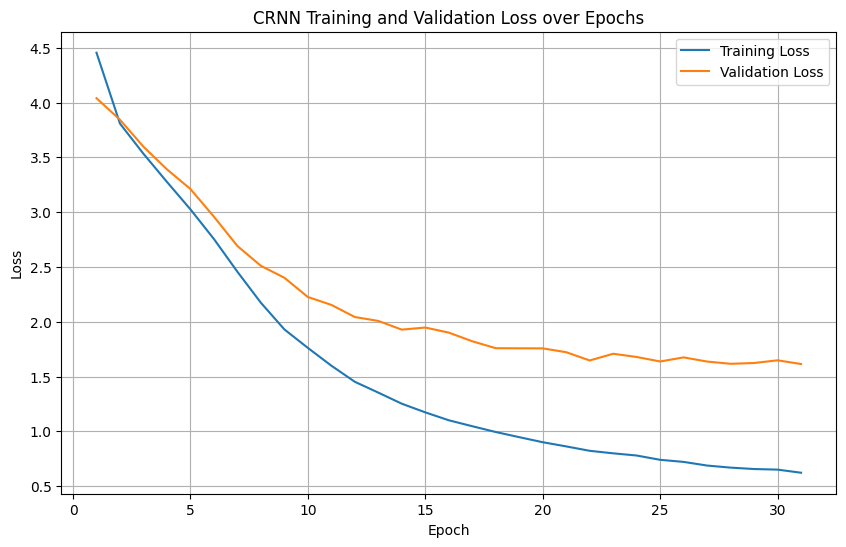

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# read the "training_log.txt" file and extract epoch, train_loss, val_loss
# [2026-01-26 21:06:40.226664] Epoch 40/80 - Train loss: 0.3422
# [2026-01-26 21:06:45.051282] Epoch 40/80 - Validation loss: 1.7005
epochs = []
train_losses = []
val_losses = []

with open("training_log_dropout_tmp.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        if "Train loss" in line:
            parts = line.split(" - ")
            epoch_part = parts[0]
            loss_part = parts[1]
            epoch_num = int(epoch_part.split("Epoch ")[1].split("/")[0])
            train_loss = float(loss_part.split(": ")[1])
            epochs.append(epoch_num)
            train_losses.append(train_loss)
        elif "Validation loss" in line:
            parts = line.split(" - ")
            loss_part = parts[1]
            val_loss = float(loss_part.split(": ")[1])
            val_losses.append(val_loss)
            
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("CRNN Training and Validation Loss over Epochs")
plt.savefig("reports/figures/training_validation_loss_dropout_1.png")
plt.show()